<a href="https://colab.research.google.com/github/AyeshaNoor0231/MNIST_FCN_Keras/blob/main/MNIST_FCNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [25]:
#Loading MNIST dataset
from tensorflow.keras.datasets import mnist

In [26]:
#Splitting Data into Test & Train
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

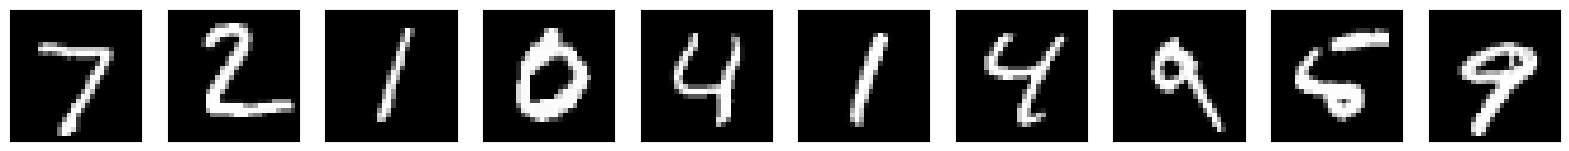

In [27]:
#Data Visualization
#Since its graphical data (images) so we need matplotlib to display data

import matplotlib.pyplot as plt

#Number of digits to display
n = 10

#Size of image to display
plt.figure(figsize=(20,4))

#Loop to dispay first n images

for i in range(n):
  x = plt.subplot(2,n, i+1)

  #Display original image
  plt.imshow(X_test[i].reshape(28,28))

  #Set colormap
  plt.gray()

  #Hide annotations(x-axis & y-axis, ticks)
  x.get_xaxis().set_visible(False)
  x.get_yaxis().set_visible(False)

  #Show the image
plt.show()

  #Close the figure
plt.close()


# **Flattening Images (2D -> 1D)**

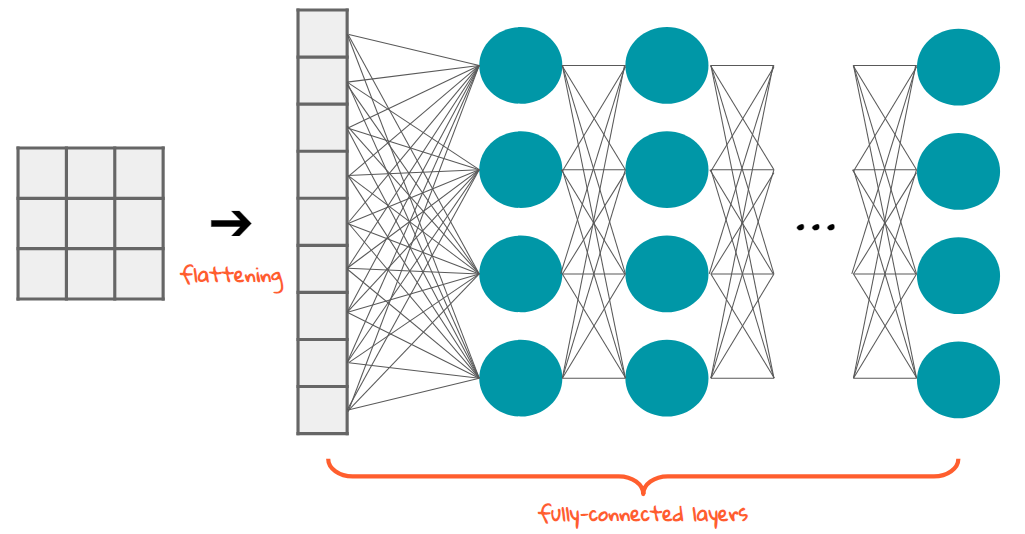

In [30]:
#Since CNN work with 1D array so we need to flatten the images

#Check shape of the original training dataset

print('X_train shape:',X_train.shape,'\nY_train shape:', Y_train.shape)

X_train shape: (60000, 784) 
Y_train shape: (60000,)


In [31]:
#Now flatten the images
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# **Min-Max Scaling**
Normalizing data in one specific range (0 &1 )

In [32]:
#Convert datatype of images to float32  (for increased speed and reduced memory)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing pixel values btw 0 & 1 range  where 0 = Black & 1 = White
X_train /= 255
X_test /= 255


# **Processing the Target Variable**
through **One_Hot** Encoded Format

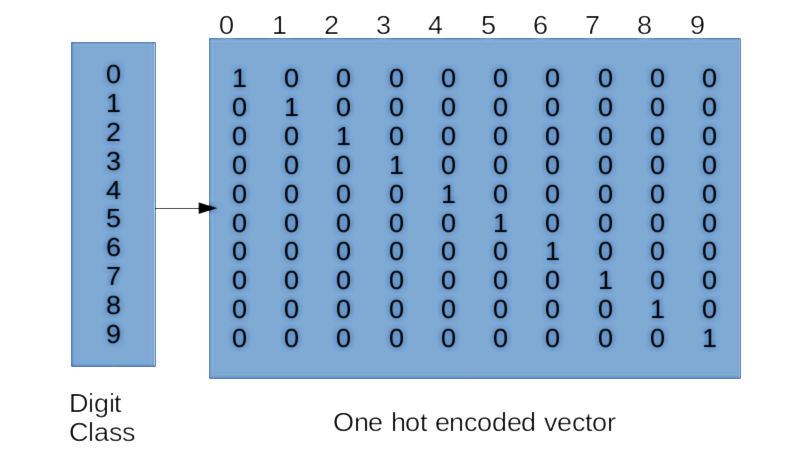

In [33]:
#Number of classes in dataset
classes = 10

#Convert the labels (y) into ONE_HOT Encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)



**Setting up Hyper_Parameters for FCN**

In [34]:
#Input size (of images)
input_size = 784

#Batch size; number of data samples processed in each batch
batch_size = 200

#1st Hidden Layer Neurons
hidden1 = 400

#2nd Hidden Layer Neurons
hidden2 = 20

#Classes in dataset
classes = 10

#Epochs; number of times model will see whole data during training
epochs = 5

**Building the FCN Model**

In [38]:
#Building Neural Network

#Create a Sequential Model which allows to build a Neural Network layer by layer
model = Sequential()

#Setting up the model

#Add 1st layer
#input_dim is size of input
model.add(Dense(hidden1, input_dim = input_size, activation = 'relu'))

#Adding 2nd layer
model.add(Dense(hidden2, activation = 'relu'))

#Adding output layer
#Softmax is use for classification more than 2.
model.add(Dense(classes, activation = 'softmax'))

#_____***Compilation***
#Compile the model by specifying the loss function, optimizer and evaluation mertics
# sgd -> gradient descent
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#Display model architecture summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dense_4 (Dense)             (None, 20)                8020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 322230 (1.23 MB)
Trainable params: 322230 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Train the Model**

In [41]:
#import time library to record time in training

from time import time

#Record time
tic = time()

#Fit the model on training dataset
model.fit(X_train, Y_train, batch_size = batch_size , epochs = epochs, verbose = 1 )

#verbose for more detailed information about how model is being trained
#Record time after training
toc = time()

#Calculate time taken by model for training
print('Model training took', (toc-tic), 'secs')


Epoch 1/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3442 - accuracy: 0.9040
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3227 - accuracy: 0.9094
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.3055 - accuracy: 0.9134
Epoch 4/5
300/300 [==============================] - 4s 13ms/step - loss: 0.2911 - accuracy: 0.9176
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.2790 - accuracy: 0.9207
Model training took 15.326637029647827 secs


In [42]:
#import libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#Predict probability for test set using trained_model
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

#Calculate the test accuracy
test_accuracy = accuracy_score(y_pred,Y_test)
print("Model test accuracy: ",test_accuracy)

Model test accuracy:  0.908


In [45]:
# Define a mask for selecting a range of indices (60 to 90)
mask = range(60, 89)

# Select the first 10 samples from the test set for visualization
X_valid = X_test[0:30]
actual_labels = Y_test[0:30]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 29ms/step


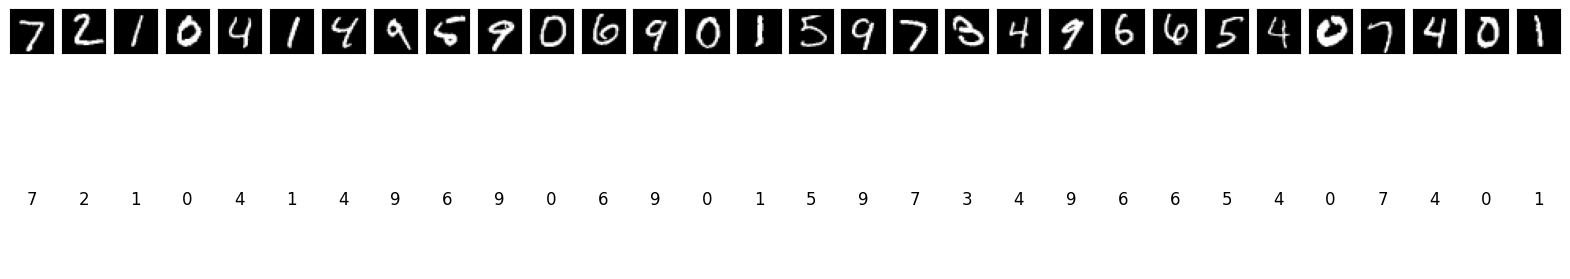

In [46]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()